In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import numpy as np
import scipy as sp
plt.rcParams['image.origin'] = 'lower' 
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
from radio_beam import Beam
from astropy.io import fits
from astropy.units import cds
import astropy.units as u

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
%run get_and_plot_vizier_nir.py

In [3]:
#%run get_and_plot_vizier_nir.py
%run functions.py

In [4]:
stars_background_im1, turbulent_stars1, turbulence1, header1 = get_and_plot_vizier_nir(imsize=512, fov=5*u.arcmin)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


> c:\users\mjfer\desktop\code\adam research\github\paschenalphamodeling\get_and_plot_vizier_nir.py(121)get_and_plot_vizier_nir()
-> source_table = Table({'amplitude': np.sqrt(phot_ct * transmission_fraction),
(Pdb) n
> c:\users\mjfer\desktop\code\adam research\github\paschenalphamodeling\get_and_plot_vizier_nir.py(122)get_and_plot_vizier_nir()
-> 'x_mean': x, #np.repeat(0, nsrc),
(Pdb) n
> c:\users\mjfer\desktop\code\adam research\github\paschenalphamodeling\get_and_plot_vizier_nir.py(123)get_and_plot_vizier_nir()
-> 'y_mean': y, #np.repeat(0, nsrc),
(Pdb) n
> c:\users\mjfer\desktop\code\adam research\github\paschenalphamodeling\get_and_plot_vizier_nir.py(124)get_and_plot_vizier_nir()
-> 'x_0': x,
(Pdb) n
> c:\users\mjfer\desktop\code\adam research\github\paschenalphamodeling\get_and_plot_vizier_nir.py(125)get_and_plot_vizier_nir()
-> 'y_0': y,
(Pdb) c
> c:\users\mjfer\desktop\code\adam research\github\paschenalphamodeling\functions.py(137)make_model_sources_image_faster()
-> model.ren

Exception: The kernel can't be normalized, because its sum is close to zero. The sum of the given kernel is < 0.01

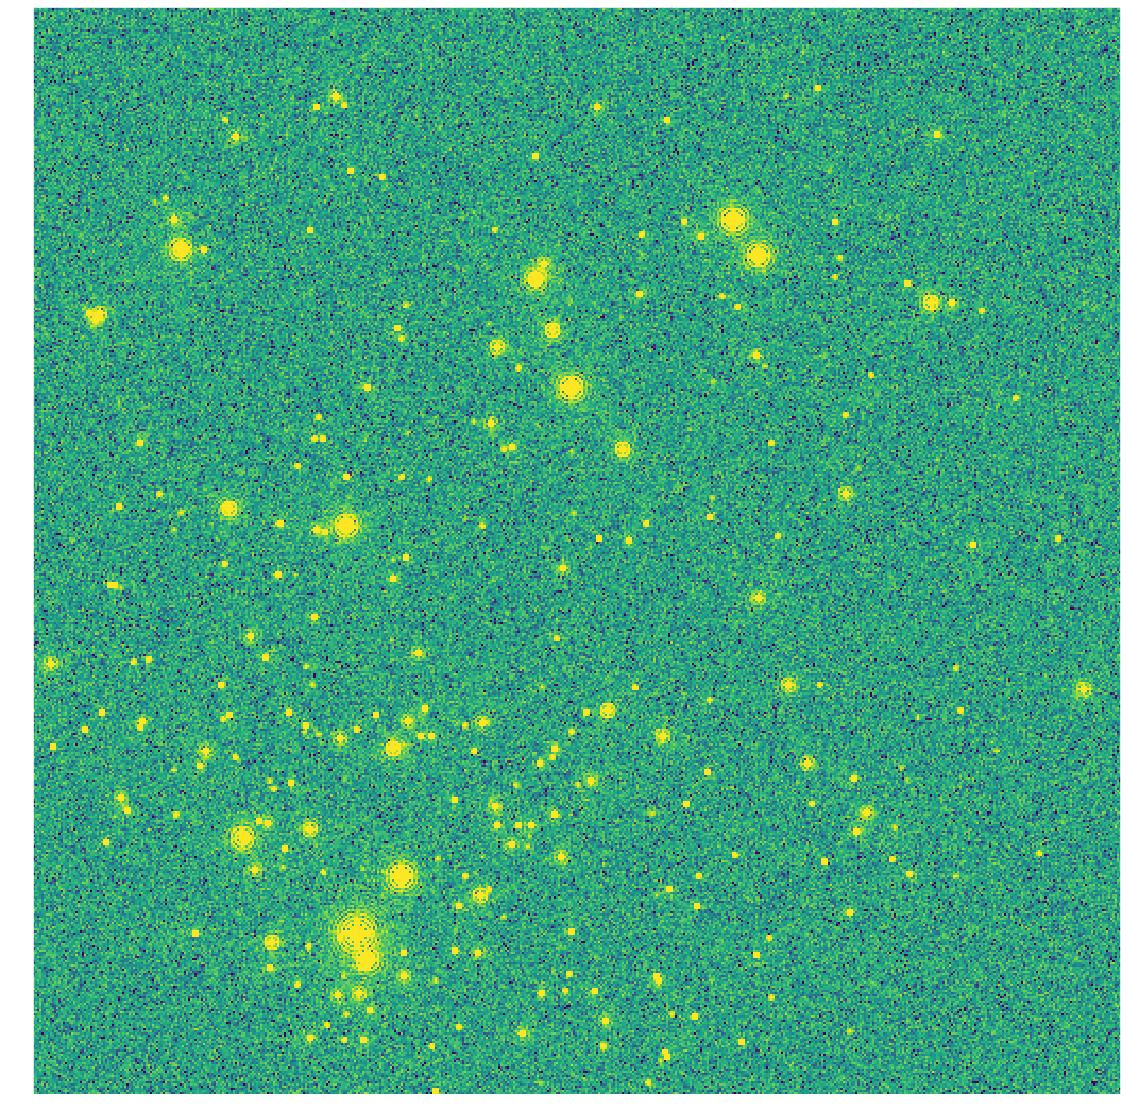

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(stars_background_im1,
          norm=visualization.simple_norm(stars_background_im1, stretch='asinh',
                                         max_percent=99, min_percent=1))

In [8]:
stars_background_im2, turbulent_stars2, turbulence2, header2 = get_and_plot_vizier_nir()

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


ValueError: The `bounding_box` is larger than the input out in one or more dimensions. Set `model.bounding_box = None`.

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(stars_background_im2, norm=visualization.simple_norm(stars_background_im2, stretch='asinh',
                                         max_percent=99, min_percent=1))

In [8]:
np.min(stars_background_im2), np.max(stars_background_im2)

(72.8430207717295, 22143228359.982742)

In [4]:
x = np.array([1023,250,10])
y = np.array([1023,250,10])
source_table = Table({'amplitude': np.array([1e50,5e22, 1e20]),
                          'x_mean': x, #np.array([0,0,0]),
                          'y_mean': y, #np.array([0,0,0]),
                          'x_0': x,
                          'y_0': y,
                          'radius': np.array([2,2,2]),
                          'x_stddev' : abs(1.2 * (x - 1024)/4096 * (x - 1024)/4096),
                          'y_stddev' : abs(0.8 * (x + 1024)/4096 * (x - 1024)/4096),
                          'theta' : np.pi * (x-1024),
                         })
shape = [2048, 2048]
airy_radius = 3.2

In [5]:
image1 = make_model_sources_image_faster(shape, airy_radius, source_table,
                                    bbox_size=10,
                                    progressbar=False)

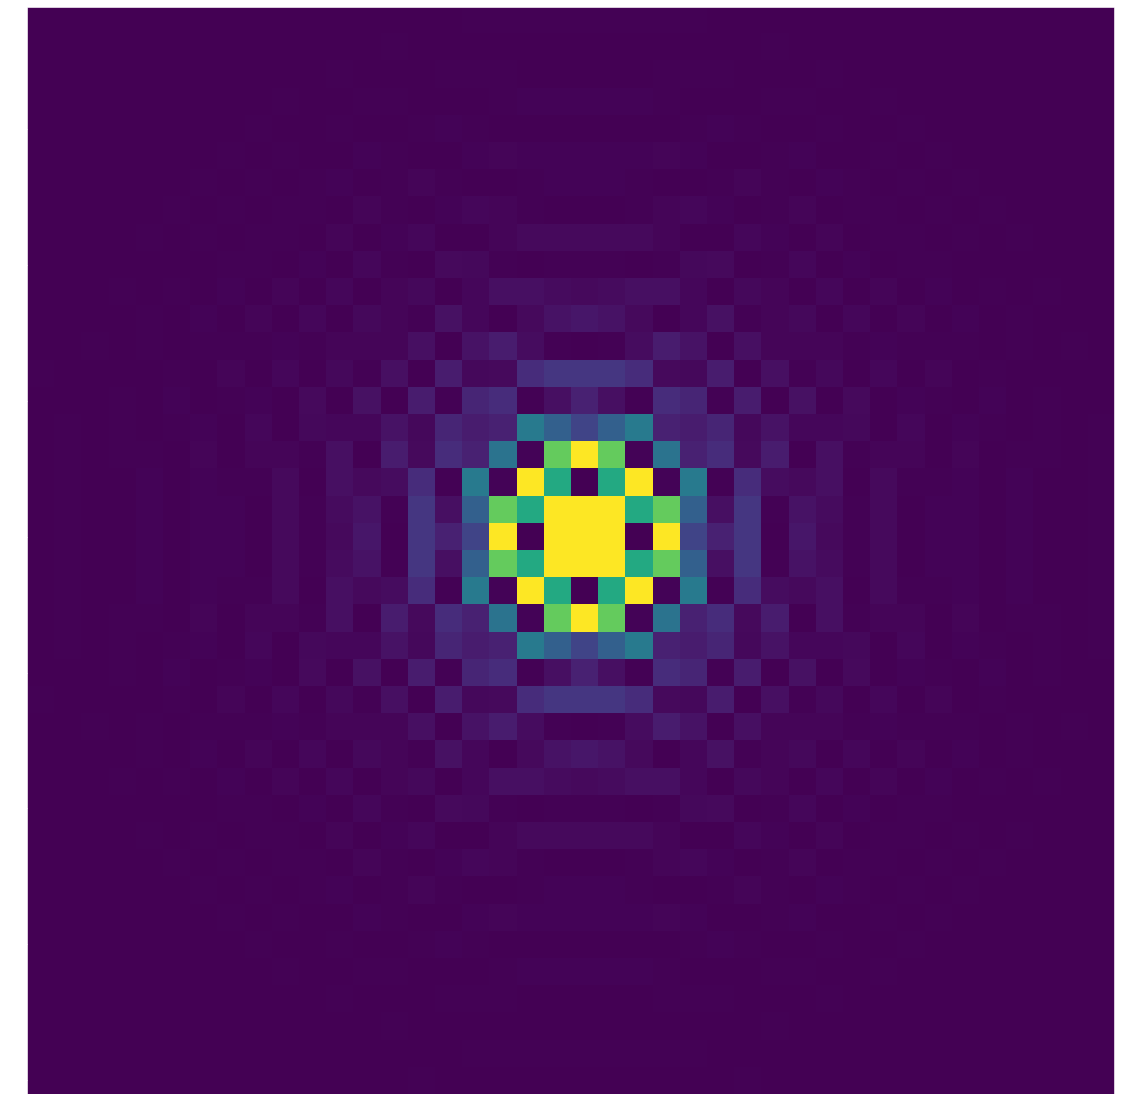

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(image1[1003:1043, 1003:1043], vmax=1e48)

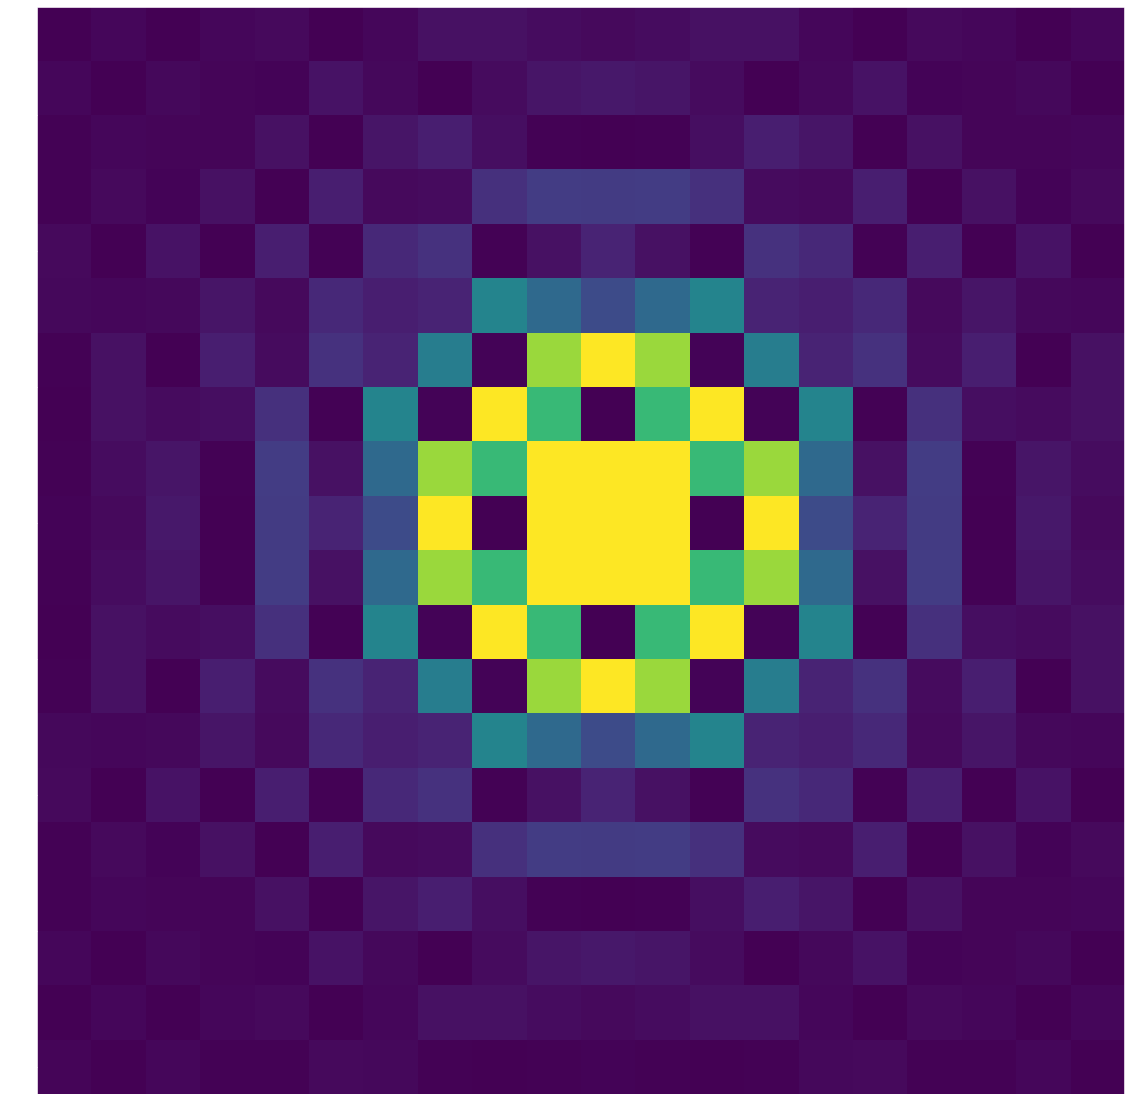

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(image1[0:20, 0:20], vmax = 9e+17)

In [7]:
np.unravel_index(image1.argmin(), image1.shape), np.unravel_index(image1.argmax(), image1.shape), image1.min(), image1.max()

((1025, 1023), (1023, 1023), -1.1959491131528202e+33, 1e+50)

In [8]:
loc = np.where(image1 != 0),
loc

((array([   0,    0,    0, ..., 1043, 1043, 1043], dtype=int64),
  array([   0,    1,    2, ..., 1041, 1042, 1043], dtype=int64)),)

In [4]:
stars_background_im = make_stars_im(1000, nstars=100)

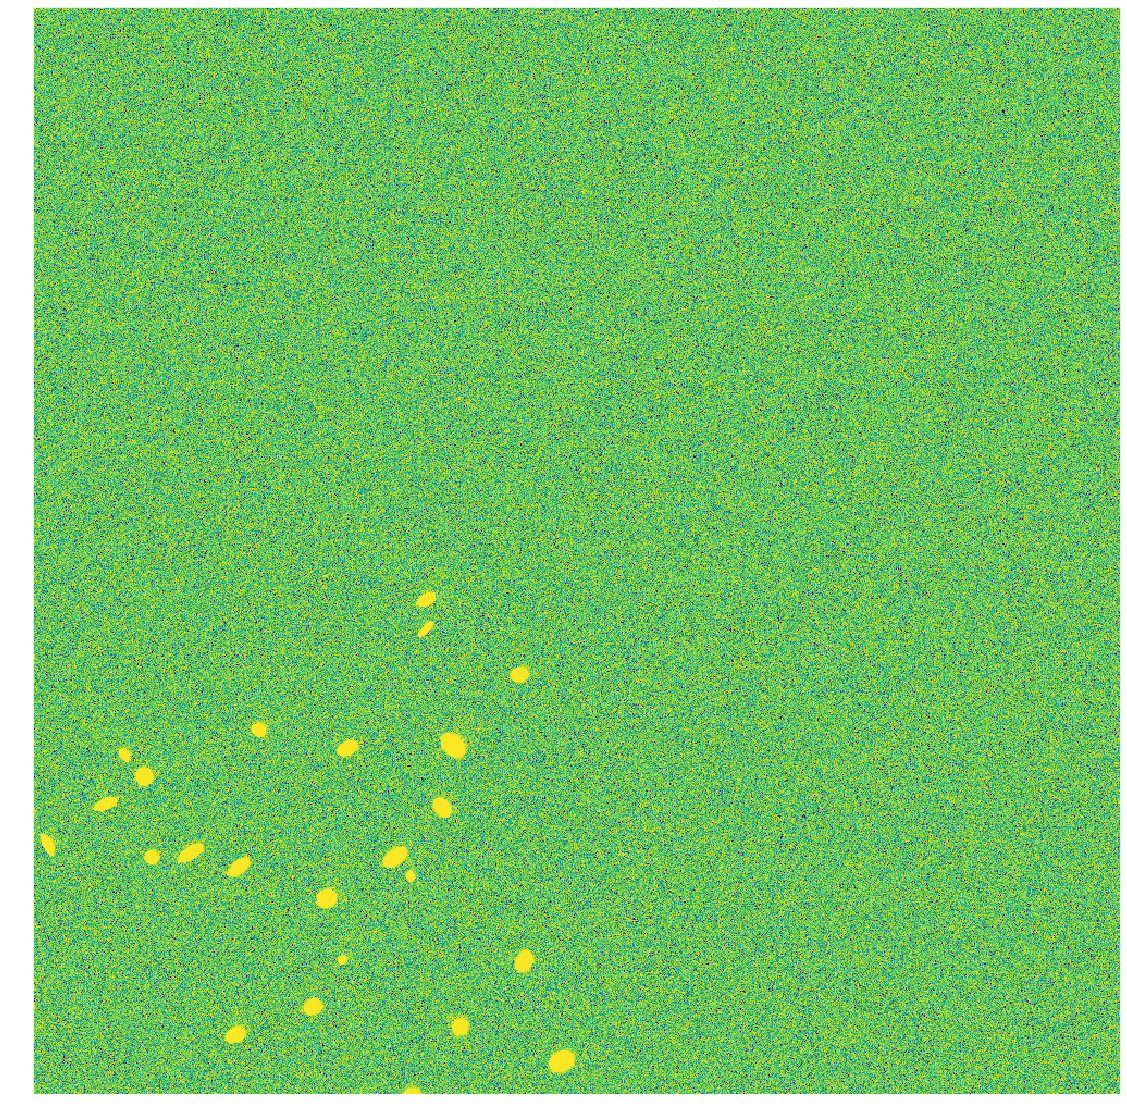

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(stars_background_im,
          norm=visualization.simple_norm(stars_background_im, stretch='asinh',
                                         max_percent=99, min_percent=1))

In [7]:
#MWE
#numbers are random bc i haven't found any that change the outcome
from astropy.convolution import convolve_models, Gaussian2DKernel
from astropy.modeling import models
g1 = models.Gaussian2D(amplitude=2, x_mean=7, y_mean=6, x_stddev=9, y_stddev=10, theta=11)
g2 = models.AiryDisk2D(amplitude=7, x_0=7, y_0=6, radius=1)
g3 = convolve_models(g2, g1)
g3([0],[0])

array([1.32433848e-08])

In [6]:
g1, g2, g3

(<Gaussian2D(amplitude=2., x_mean=0., y_mean=0., x_stddev=9., y_stddev=10., theta=11.)>,
 <AiryDisk2D(amplitude=7., x_0=0., y_0=0., radius=1.)>,
 <CompoundModel(amplitude_0=7., x_0_0=0., y_0_0=0., radius_0=1., amplitude_1=2., x_mean_1=0., y_mean_1=0., x_stddev_1=9., y_stddev_1=10., theta_1=11.)>)